In [1]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_NID import Dataset_IoT_NID
import pickle

In [2]:
from experiment import Experiment
save_dataset = False
if save_dataset == True:
    # データセットの取得
    dataset_UNSW_NB15 = Dataset_UNSW_NB15().get_data()
    dataset_NSL_KDD = Dataset_NSL_KDD().get_data()
    dataset_IoT_NID = Dataset_IoT_NID().get_data()

    # データセットをpickle形式で保存
    with open('pickles/dataset_UNSW_NB15.pkl', 'wb') as f:
        pickle.dump(dataset_UNSW_NB15, f)
    with open('pickles/dataset_NSL_KDD.pkl', 'wb') as f:
        pickle.dump(dataset_NSL_KDD, f)
    with open('pickles/dataset_IoT_NID.pkl', 'wb') as f:
        pickle.dump(dataset_IoT_NID, f)

# データセットをpickle形式で読み込み
with open ('pickles/dataset_UNSW_NB15.pkl', 'rb') as f:
    dataset_UNSW_NB15 = pickle.load(f)
with open ('pickles/dataset_NSL_KDD.pkl', 'rb') as f:
    dataset_NSL_KDD = pickle.load(f)
with open ('pickles/dataset_IoT_NID.pkl', 'rb') as f:
    dataset_IoT_NID = pickle.load(f)

# モデルの生成
exp_UNSW = Experiment(dataset_UNSW_NB15)
exp_NSL = Experiment(dataset_NSL_KDD)
exp_IoT = Experiment(dataset_IoT_NID)

# パラメータの設定
model_params_noFS = {
    'k': 500,
    'c_attack': 0.3,
    'c_normal': 0.1,
    'n_estimators': 100,
    'max_features': 1.0,
    'max_samples': 256, 
    'if_sampling' : False,
}

model_params_mean = {
    'k': 500,
    'n_ohe': 10,
    'n_num': 10,
    'c_attack': 0.3,
    'c_normal': 0.1,
    'max_features': 1.0,
    'n_estimators': 100,
    'max_samples': 256,
}

model_params_hybrid = {
    'k': 500,
    'n_fi': 10,
    'n_pca': 10,
    'c_attack': 0.3,
    'c_normal': 0.1,
    'max_features': 1.0,
    'n_estimators': 100,
    'max_samples': 256,
}

model_params_var = {
    'k': 500,
    'n_ohe': 10,
    'n_num': 10,
    'c_attack': 0.3,
    'c_normal': 0.1,
    'n_estimators': 100,
    'max_features': 1.0,
    'max_samples': 256,
}

model_params_cor = {
    'k': 500,
    'threshold': 0.5,
    'c_attack': 0.2,
    'c_normal': 0.1,
    'n_estimators': 100,
    'max_features': 1.0,
    'max_samples': 256, 
}

model_params_FI = {
    'k': 500,
    'threshold': 0.01,
    'c_attack': 0.3,
    'c_normal': 0.1,
    'n_estimators': 100,
    'max_features': 1.0,
    'max_samples': 256,
}

In [ ]:
exp_UNSW.run_noFS(model_params_noFS, if_plot=True)

In [ ]:
exp_UNSW.run_hybrid(model_params_hybrid, if_plot=True)

In [ ]:
exp_UNSW.run_mean(model_params_mean, if_plot=True)

In [ ]:
exp_UNSW.run_var(model_params_var, if_plot=True)

In [ ]:
exp_UNSW.run_cor(model_params_cor, if_plot=True)

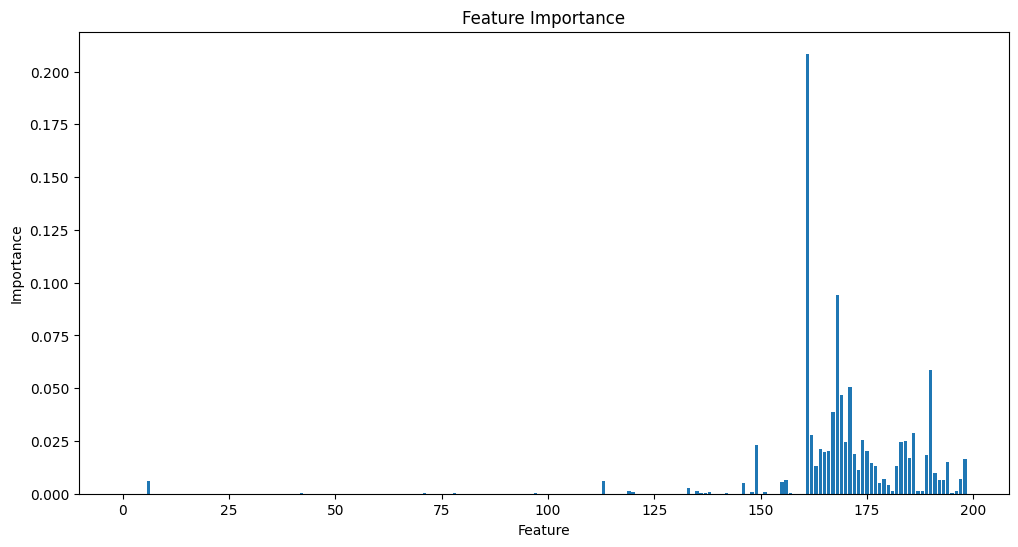

------------------------------
Feature selection: Feature Importance k:500
Accuracy: 0.634
F1 Score: 0.697
Fit Time: 14.587s
Evaluate Time per Data: 4.514us
------------------------------


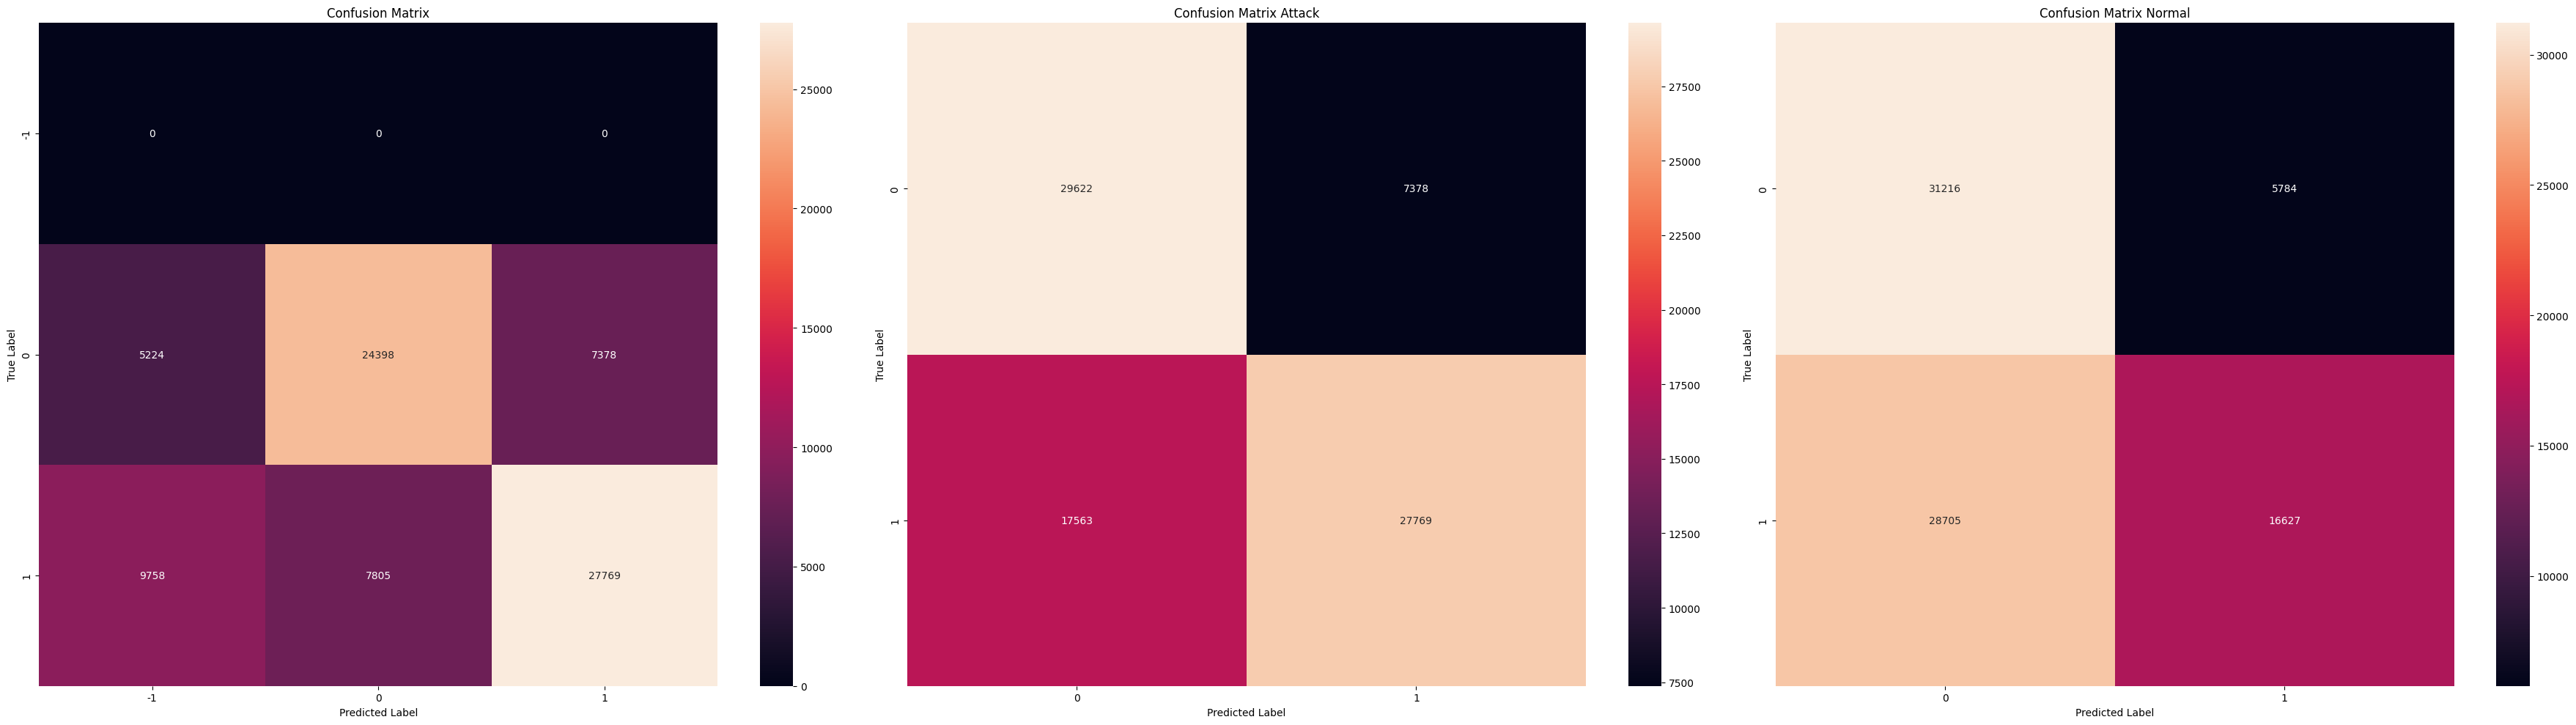

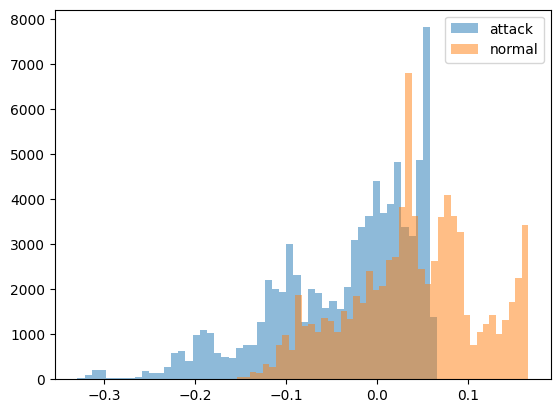

In [3]:
exp_UNSW.run_FI(model_params_FI, if_plot=True)

In [ ]:
exp_NSL.run_noFS(model_params_noFS, if_plot=True)

In [ ]:
exp_NSL.run_hybrid(model_params_hybrid, if_plot=True)

In [ ]:
exp_NSL.run_mean(model_params_mean, if_plot=True)

In [ ]:
exp_NSL.run_var(model_params_var, if_plot=True)

In [ ]:
exp_NSL.run_cor(model_params_cor, if_plot=True)

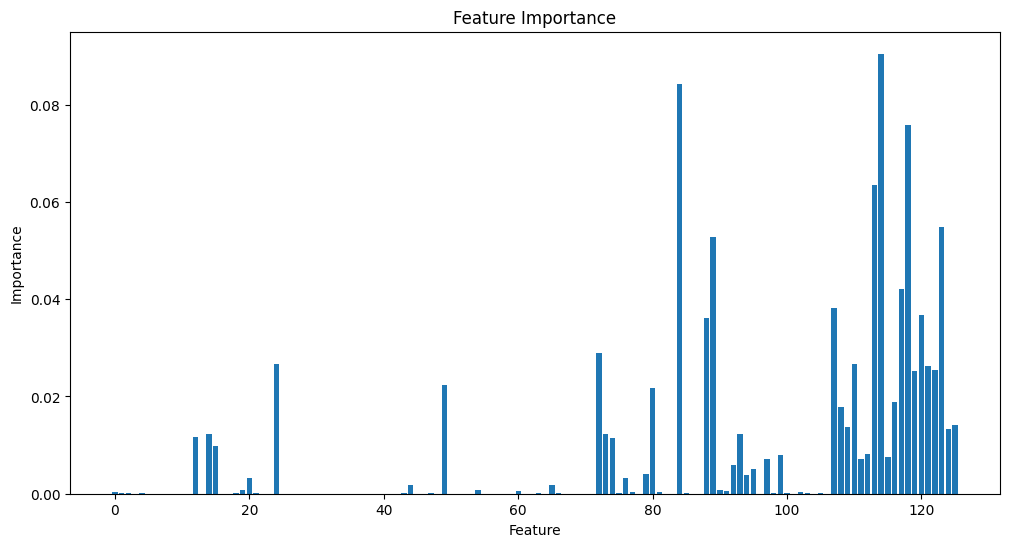

------------------------------
Feature selection: Feature Importance k:500
Accuracy: 0.579
F1 Score: 0.628
Fit Time: 6.223s
Evaluate Time per Data: 5.941us
------------------------------


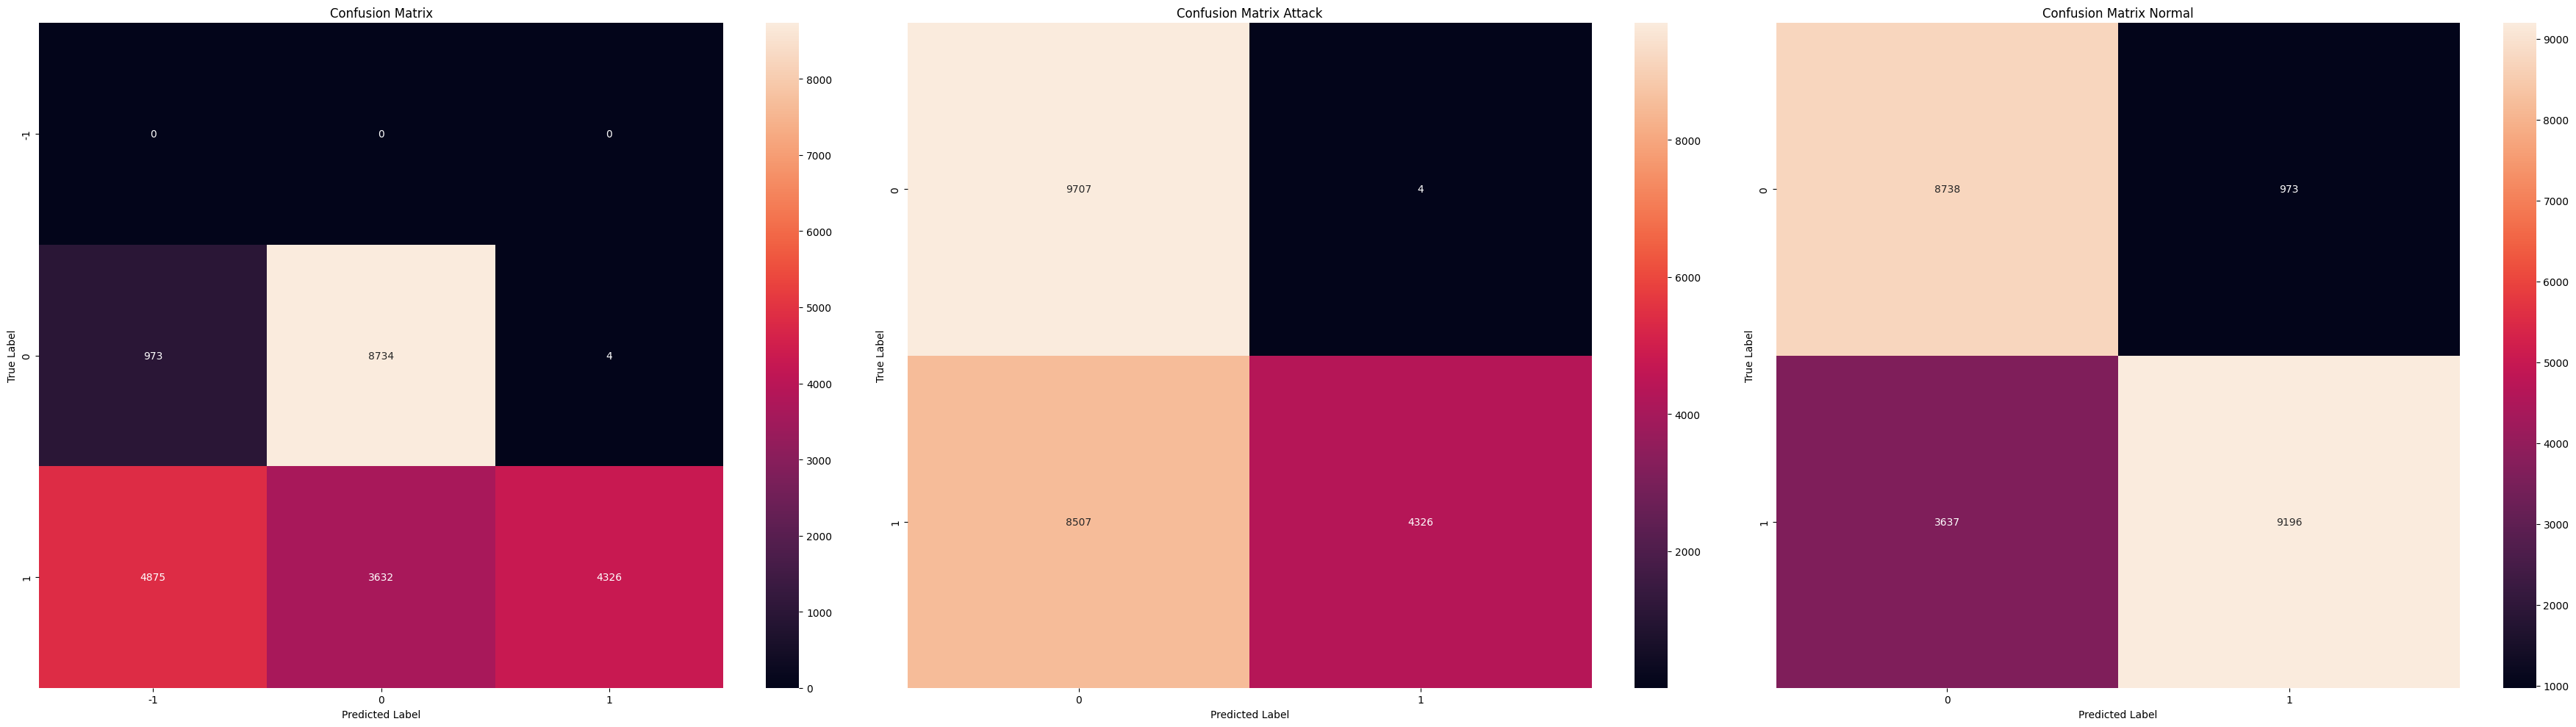

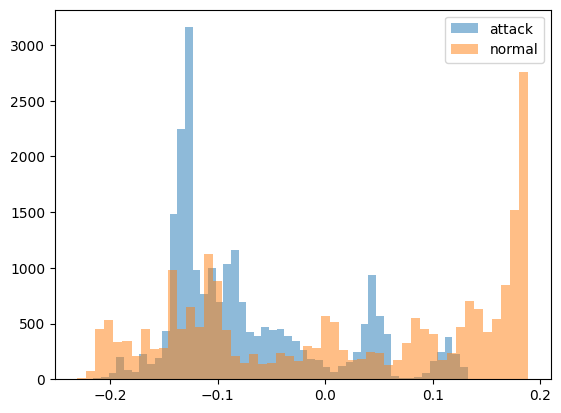

In [4]:
exp_NSL.run_FI(model_params_FI, if_plot=True)

In [ ]:
exp_IoT.run_noFS(model_params_noFS, if_plot=True)

In [ ]:
exp_IoT.run_hybrid(model_params_hybrid, if_plot=True)

In [ ]:
exp_IoT.run_mean(model_params_mean, if_plot=True)

In [ ]:
exp_IoT.run_var(model_params_var, if_plot=True)

In [ ]:
from IPython.display import clear_output
from sklearn.metrics import f1_score

# パラメータの範囲を設定
c_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
n_estimators_values = [100, 500, 1000]
max_features_values = [0.1, 0.5, 1.0]
max_samples_values = [256]

best_accuracy = 0
best_f1 = 0
best_params = {}

# 全体のループ数を計算
total_loops = len(c_values) * len(n_estimators_values) * len(max_features_values) * len(max_samples_values)
current_loop = 0

# すべてのパラメータの組み合わせについてループ
for c in c_values:
    for n_estimators in n_estimators_values:
        for max_features in max_features_values:
            for max_samples in max_samples_values:
                # パラメータを設定
                model_params_noFS = {
                    'k': 500,
                    'c_attack': c,
                    'c_normal': c,
                    'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_samples': max_samples, 
                    'if_sampling' : False,
                }

                # モデルを学習
                exp_UNSW.run_noFS(model_params_noFS, if_plot=False)
                
                # 最良のスコアを更新
                if exp_UNSW.accuracy > best_accuracy:
                    best_score = exp_UNSW.accuracy
                    best_params_accuracy = model_params_noFS
                
                if exp_UNSW.f1 > best_f1:
                    best_f1 = exp_UNSW.f1
                    best_params_f1 = model_params_noFS

                # 現在のループ数を更新
                current_loop += 1

                # 進行状況を表示
                clear_output(wait=True)
                print(f"Progress: {current_loop / total_loops * 100:.2f}%")

# 最良のパラメータを表示
print("Best accuracy:", best_accuracy)
print("Best parameters:", best_params)
print("Best f1:", best_f1)
print("Best parameters:", best_params_f1)